NAME - PRIYANKA RAJESH GADRE

DOMAIN - DATA SCIENCE INTERNSHIP

TASK-04- Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics and brands.


In [ ]:

# First, let's install necessary libraries
!pip install pandas numpy matplotlib seaborn plotly wordcloud textblob nltk scikit-learn vaderSentiment
!pip install kaggle

# ====================
# 1. IMPORT LIBRARIES
# ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# 2. LOAD DATASET FROM KAGGLE

# Used a comprehensive Twitter sentiment dataset

# Method 1: Direct download from GitHub (alternative)
!wget -q https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv

# Load the dataset
df = pd.read_csv('train.csv', encoding='latin-1')
df = df.rename(columns={'label': 'sentiment', 'text': 'tweet'})

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())

Dataset Shape: (31962, 3)

First few rows:
   id  sentiment                                              tweet
0   1          0   @user when a father is dysfunctional and is s...
1   2          0  @user @user thanks for #lyft credit i can't us...
2   3          0                                bihday your majesty
3   4          0  #model   i love u take with u all the time in ...
4   5          0             factsguide: society now    #motivation

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         31962 non-null  int64 
 1   sentiment  31962 non-null  int64 
 2   tweet      31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None

Sentiment Distribution:
sentiment
0    29720
1     2242
Name: count, dtype: int64


In [ ]:
# ====================
# 3. DATA PREPROCESSING
# ====================
def clean_text(text):
    """
    Clean social media text
    """
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()

        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

        # Remove user mentions
        text = re.sub(r'@\w+', '', text)

        # Remove hashtags but keep the text
        text = re.sub(r'#', '', text)

        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()

        return text
    return ""

# Apply cleaning
df['cleaned_tweet'] = df['tweet'].apply(clean_text)

# Remove empty tweets
df = df[df['cleaned_tweet'].str.len() > 0]

print("After cleaning:")
print(f"Total tweets: {len(df)}")
print(f"Sample cleaned tweets:\n{df['cleaned_tweet'].head()}")

After cleaning:
Total tweets: 31960
Sample cleaned tweets:
0    when a father is dysfunctional and is so selfi...
1    thanks for lyft credit i cant use cause they d...
2                                  bihday your majesty
3        model i love u take with u all the time in ur
4                    factsguide society now motivation
Name: cleaned_tweet, dtype: object


In [ ]:
# 4. TEXT PROCESSING FUNCTIONS

nltk.download('punkt_tab')
def preprocess_text(text):
    """
    Tokenize, remove stopwords, and lemmatize
    """
    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    return ' '.join(lemmatized_tokens)

# Apply preprocessing
df['processed_tweet'] = df['cleaned_tweet'].apply(preprocess_text)

# Create sentiment labels mapping
df['sentiment_label'] = df['sentiment'].map({0: 'Negative', 4: 'Positive'})

print("Text processing completed!")
print(f"Sample processed tweets:\n{df['processed_tweet'].head()}")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Text processing completed!
Sample processed tweets:
0    father dysfunctional selfish drag kid dysfunct...
1    thanks lyft credit cant use cause dont offer w...
2                                       bihday majesty
3                          model love u take u time ur
4                        factsguide society motivation
Name: processed_tweet, dtype: object


In [ ]:

# 5. SENTIMENT ANALYSIS WITH MULTIPLE METHODS (FIXED VERSION)

import pandas as pd
import numpy as np
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('ignore')

# Initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment_textblob(text):
    """
    Analyze sentiment using TextBlob with error handling
    """
    try:
        if not isinstance(text, str) or len(text.strip()) == 0:
            return 'Neutral', 0.0

        analysis = TextBlob(text)
        polarity = analysis.sentiment.polarity

        if polarity > 0.05:  # Using 0.05 threshold for better classification
            return 'Positive', polarity
        elif polarity < -0.05:
            return 'Negative', polarity
        else:
            return 'Neutral', polarity
    except Exception as e:
        return 'Neutral', 0.0

def analyze_sentiment_vader(text):
    """
    Analyze sentiment using VADER (specifically for social media)
    """
    try:
        if not isinstance(text, str) or len(text.strip()) == 0:
            return 'Neutral', 0.0

        scores = analyzer.polarity_scores(text)
        compound = scores['compound']

        # Standard VADER thresholds
        if compound >= 0.05:
            return 'Positive', compound
        elif compound <= -0.05:
            return 'Negative', compound
        else:
            return 'Neutral', compound
    except Exception as e:
        return 'Neutral', 0.0

# Apply sentiment analysis on a sample first to test
print("Testing sentiment analysis on sample tweets...")
sample_tweets = [
    "I love this product! It's amazing!",
    "This is terrible and I hate it",
    "It's okay, not great but not bad",
    "",
    None
]

for tweet in sample_tweets:
    tb_sent, tb_score = analyze_sentiment_textblob(tweet)
    vader_sent, vader_score = analyze_sentiment_vader(tweet)
    print(f"Tweet: {tweet}")
    print(f"  TextBlob: {tb_sent} ({tb_score:.3f})")
    print(f"  VADER:    {vader_sent} ({vader_score:.3f})")
    print("-" * 50)

# Now apply to the dataframe (using a sample if the dataset is too large)
# Let's first check the size and apply to a manageable sample
print(f"\nDataset size: {len(df)} rows")

# If dataset is too large, work with a sample for faster processing
if len(df) > 5000:
    print("Dataset is large, using sample of 5000 rows for sentiment analysis...")
    df_sample = df.sample(n=5000, random_state=42).copy()
else:
    df_sample = df.copy()

# Apply sentiment analysis with progress indication
print("\nApplying TextBlob sentiment analysis...")
from tqdm import tqdm
tqdm.pandas(desc="Processing TextBlob")

tb_results = df_sample['cleaned_tweet'].progress_apply(
    lambda x: pd.Series(analyze_sentiment_textblob(x))
)
df_sample[['tb_sentiment', 'tb_score']] = tb_results

print("Applying VADER sentiment analysis...")
vader_results = df_sample['cleaned_tweet'].progress_apply(
    lambda x: pd.Series(analyze_sentiment_vader(x))
)
df_sample[['vader_sentiment', 'vader_score']] = vader_results

# Update the main dataframe with sample results
df = df_sample.copy()

print("\n" + "="*60)
print("SENTIMENT ANALYSIS RESULTS")
print("="*60)

print("\nTextBlob Sentiment Distribution:")
tb_dist = df['tb_sentiment'].value_counts()
print(tb_dist)

print("\nTextBlob Sentiment Percentages:")
tb_percent = df['tb_sentiment'].value_counts(normalize=True) * 100
for sentiment, percent in tb_percent.items():
    print(f"{sentiment}: {percent:.2f}%")

print("\nVADER Sentiment Distribution:")
vader_dist = df['vader_sentiment'].value_counts()
print(vader_dist)

print("\nVADER Sentiment Percentages:")
vader_percent = df['vader_sentiment'].value_counts(normalize=True) * 100
for sentiment, percent in vader_percent.items():
    print(f"{sentiment}: {percent:.2f}%")

# Calculate agreement between methods
agreement = (df['tb_sentiment'] == df['vader_sentiment']).mean() * 100
print(f"\nAgreement between TextBlob and VADER: {agreement:.2f}%")

# Calculate average scores
print(f"\nAverage TextBlob Score: {df['tb_score'].mean():.3f}")
print(f"Average VADER Score: {df['vader_score'].mean():.3f}")

# Show some examples
print("\n" + "="*60)
print("SENTIMENT ANALYSIS EXAMPLES")
print("="*60)
print("\nSample results (first 5 tweets):")
print("-" * 100)

for idx, row in df.head().iterrows():
    print(f"\nOriginal: {row['tweet'][:100]}...")
    print(f"Cleaned:  {row['cleaned_tweet'][:100]}...")
    print(f"TextBlob: {row['tb_sentiment']} (Score: {row['tb_score']:.3f})")
    print(f"VADER:    {row['vader_sentiment']} (Score: {row['vader_score']:.3f})")
    print("-" * 100)

# Create a comparison dataframe for visualization
comparison_df = pd.DataFrame({
    'Method': ['TextBlob', 'TextBlob', 'TextBlob', 'VADER', 'VADER', 'VADER'],
    'Sentiment': ['Positive', 'Neutral', 'Negative', 'Positive', 'Neutral', 'Negative'],
    'Count': [
        tb_dist.get('Positive', 0),
        tb_dist.get('Neutral', 0),
        tb_dist.get('Negative', 0),
        vader_dist.get('Positive', 0),
        vader_dist.get('Neutral', 0),
        vader_dist.get('Negative', 0)
    ]
})

print("\nComparison DataFrame:")
print(comparison_df)

# Save results to CSV for backup
df.to_csv('sentiment_analysis_results.csv', index=False)
print("\n✅ Sentiment analysis completed successfully!")
print("📁 Results saved to 'sentiment_analysis_results.csv'")

Testing sentiment analysis on sample tweets...
Tweet: I love this product! It's amazing!
  TextBlob: Positive (0.688)
  VADER:    Positive (0.862)
--------------------------------------------------
Tweet: This is terrible and I hate it
  TextBlob: Negative (-0.900)
  VADER:    Negative (-0.778)
--------------------------------------------------
Tweet: It's okay, not great but not bad
  TextBlob: Positive (0.150)
  VADER:    Positive (0.473)
--------------------------------------------------
Tweet: 
  TextBlob: Neutral (0.000)
  VADER:    Neutral (0.000)
--------------------------------------------------
Tweet: None
  TextBlob: Neutral (0.000)
  VADER:    Neutral (0.000)
--------------------------------------------------

Dataset size: 31960 rows
Dataset is large, using sample of 5000 rows for sentiment analysis...

Applying TextBlob sentiment analysis...


Processing TextBlob: 100%|██████████| 5000/5000 [00:03<00:00, 1363.24it/s]


Applying VADER sentiment analysis...


Processing TextBlob: 100%|██████████| 5000/5000 [00:00<00:00, 5533.27it/s]



SENTIMENT ANALYSIS RESULTS

TextBlob Sentiment Distribution:
tb_sentiment
Positive    2459
Neutral     1883
Negative     658
Name: count, dtype: int64

TextBlob Sentiment Percentages:
Positive: 49.18%
Neutral: 37.66%
Negative: 13.16%

VADER Sentiment Distribution:
vader_sentiment
Positive    2621
Neutral     1337
Negative    1042
Name: count, dtype: int64

VADER Sentiment Percentages:
Positive: 52.42%
Neutral: 26.74%
Negative: 20.84%

Agreement between TextBlob and VADER: 68.28%

Average TextBlob Score: 0.157
Average VADER Score: 0.217

SENTIMENT ANALYSIS EXAMPLES

Sample results (first 5 tweets):
----------------------------------------------------------------------------------------------------

Original: what a great week! kms was awarded again to promote @user in #germany.    #sunnysideoflife ...
Cleaned:  what a great week kms was awarded again to promote in germany sunnysideoflife...
TextBlob: Positive (Score: 0.800)
VADER:    Positive (Score: 0.856)
----------------------------

In [ ]:

# 6. EXPLORATORY DATA ANALYSIS

# Create subplots for comprehensive visualization
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=('Original Sentiment Distribution',
                    'TextBlob Sentiment Distribution',
                    'VADER Sentiment Distribution',
                    'Tweet Length Distribution',
                    'Average Sentiment Scores',
                    'Sentiment Comparison'),
    specs=[[{'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}],
           [{'type': 'bar'}, {'type': 'bar'}, {'type': 'scatter'}]]
)

# 1. Original sentiment distribution
orig_counts = df['sentiment_label'].value_counts()
fig.add_trace(
    go.Pie(labels=orig_counts.index, values=orig_counts.values, name='Original'),
    row=1, col=1
)

# 2. TextBlob sentiment distribution
tb_counts = df['tb_sentiment'].value_counts()
fig.add_trace(
    go.Pie(labels=tb_counts.index, values=tb_counts.values, name='TextBlob'),
    row=1, col=2
)

# 3. VADER sentiment distribution
vader_counts = df['vader_sentiment'].value_counts()
fig.add_trace(
    go.Pie(labels=vader_counts.index, values=vader_counts.values, name='VADER'),
    row=1, col=3
)

# 4. Tweet length distribution
df['tweet_length'] = df['cleaned_tweet'].apply(len)
fig.add_trace(
    go.Bar(x=['Short', 'Medium', 'Long'],
           y=[len(df[df['tweet_length'] < 50]),
              len(df[(df['tweet_length'] >= 50) & (df['tweet_length'] < 100)]),
              len(df[df['tweet_length'] >= 100])],
           name='Length Distribution',
           marker_color=['#FF6B6B', '#4ECDC4', '#45B7D1']),
    row=2, col=1
)

# 5. Average sentiment scores by method
methods = ['TextBlob', 'VADER']
scores = [df['tb_score'].mean(), df['vader_score'].mean()]
fig.add_trace(
    go.Bar(x=methods, y=scores, name='Avg Scores',
           marker_color=['#95E1D3', '#F38181']),
    row=2, col=2
)

# 6. Sentiment comparison scatter plot
fig.add_trace(
    go.Scatter(x=df['tb_score'][:100], y=df['vader_score'][:100],
               mode='markers', name='Comparison',
               marker=dict(size=8, color=df['tb_score'][:100],
                           colorscale='RdYlGn', showscale=True)),
    row=2, col=3
)

fig.update_layout(height=800, width=1200, title_text="Comprehensive Sentiment Analysis Dashboard")
fig.show()

Word Cloud for All Tweets:


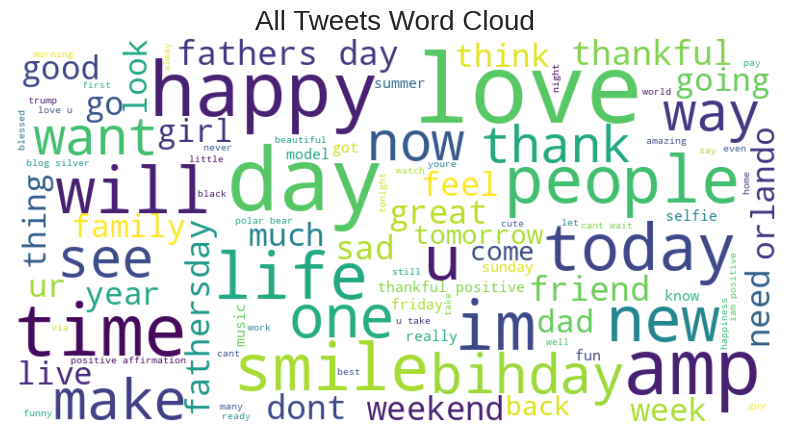


Word Cloud for Positive Tweets:


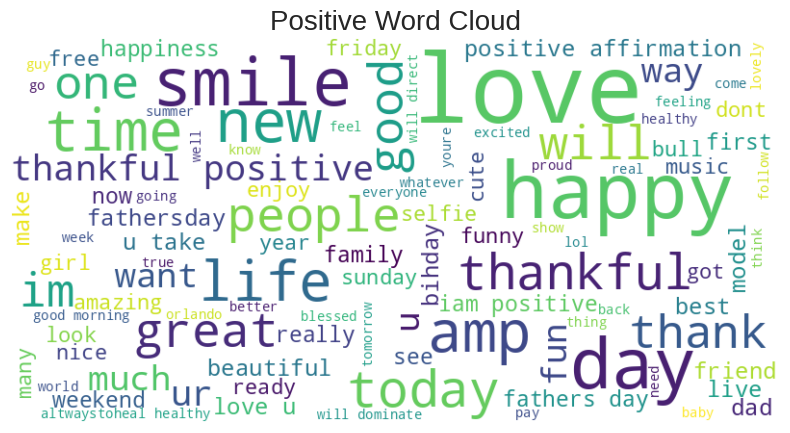


Word Cloud for Negative Tweets:


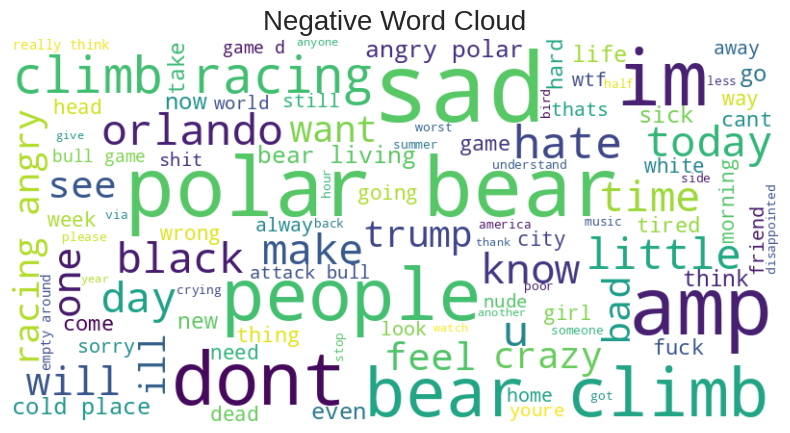

In [ ]:
# ====================
# 7. WORD CLOUD VISUALIZATION
# ====================
def generate_wordcloud(text_series, title, sentiment=None):
    """
    Generate word cloud for specific sentiment
    """
    if sentiment:
        text = ' '.join(text_series[df['tb_sentiment'] == sentiment].tolist())
    else:
        text = ' '.join(text_series.tolist())

    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          stopwords=STOPWORDS,
                          max_words=100,
                          max_font_size=100,
                          random_state=42).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{title} Word Cloud', fontsize=20)
    plt.axis('off')
    plt.show()

# Generate word clouds for different sentiments
print("Word Cloud for All Tweets:")
generate_wordcloud(df['cleaned_tweet'], "All Tweets")

print("\nWord Cloud for Positive Tweets:")
generate_wordcloud(df['cleaned_tweet'], "Positive", sentiment='Positive')

print("\nWord Cloud for Negative Tweets:")
generate_wordcloud(df['cleaned_tweet'], "Negative", sentiment='Negative')

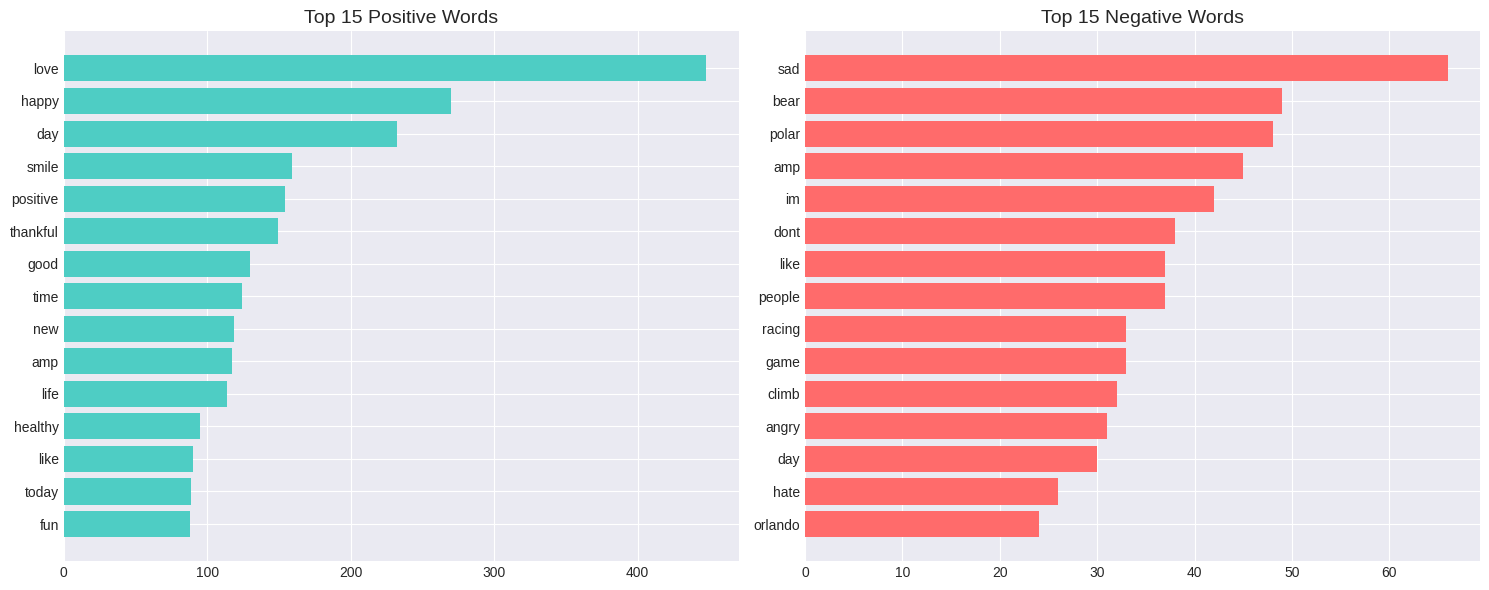

In [ ]:

# 8. FREQUENT TERMS ANALYSIS

def get_top_n_words(corpus, n=20):
    """
    Get top N frequent words
    """
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top words for positive and negative sentiments
positive_tweets = df[df['tb_sentiment'] == 'Positive']['processed_tweet']
negative_tweets = df[df['tb_sentiment'] == 'Negative']['processed_tweet']

top_positive = get_top_n_words(positive_tweets, 15)
top_negative = get_top_n_words(negative_tweets, 15)

# Create bar charts
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Positive words
positive_words, positive_counts = zip(*top_positive)
axes[0].barh(positive_words, positive_counts, color='#4ECDC4')
axes[0].set_title('Top 15 Positive Words', fontsize=14)
axes[0].invert_yaxis()

# Negative words
negative_words, negative_counts = zip(*top_negative)
axes[1].barh(negative_words, negative_counts, color='#FF6B6B')
axes[1].set_title('Top 15 Negative Words', fontsize=14)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

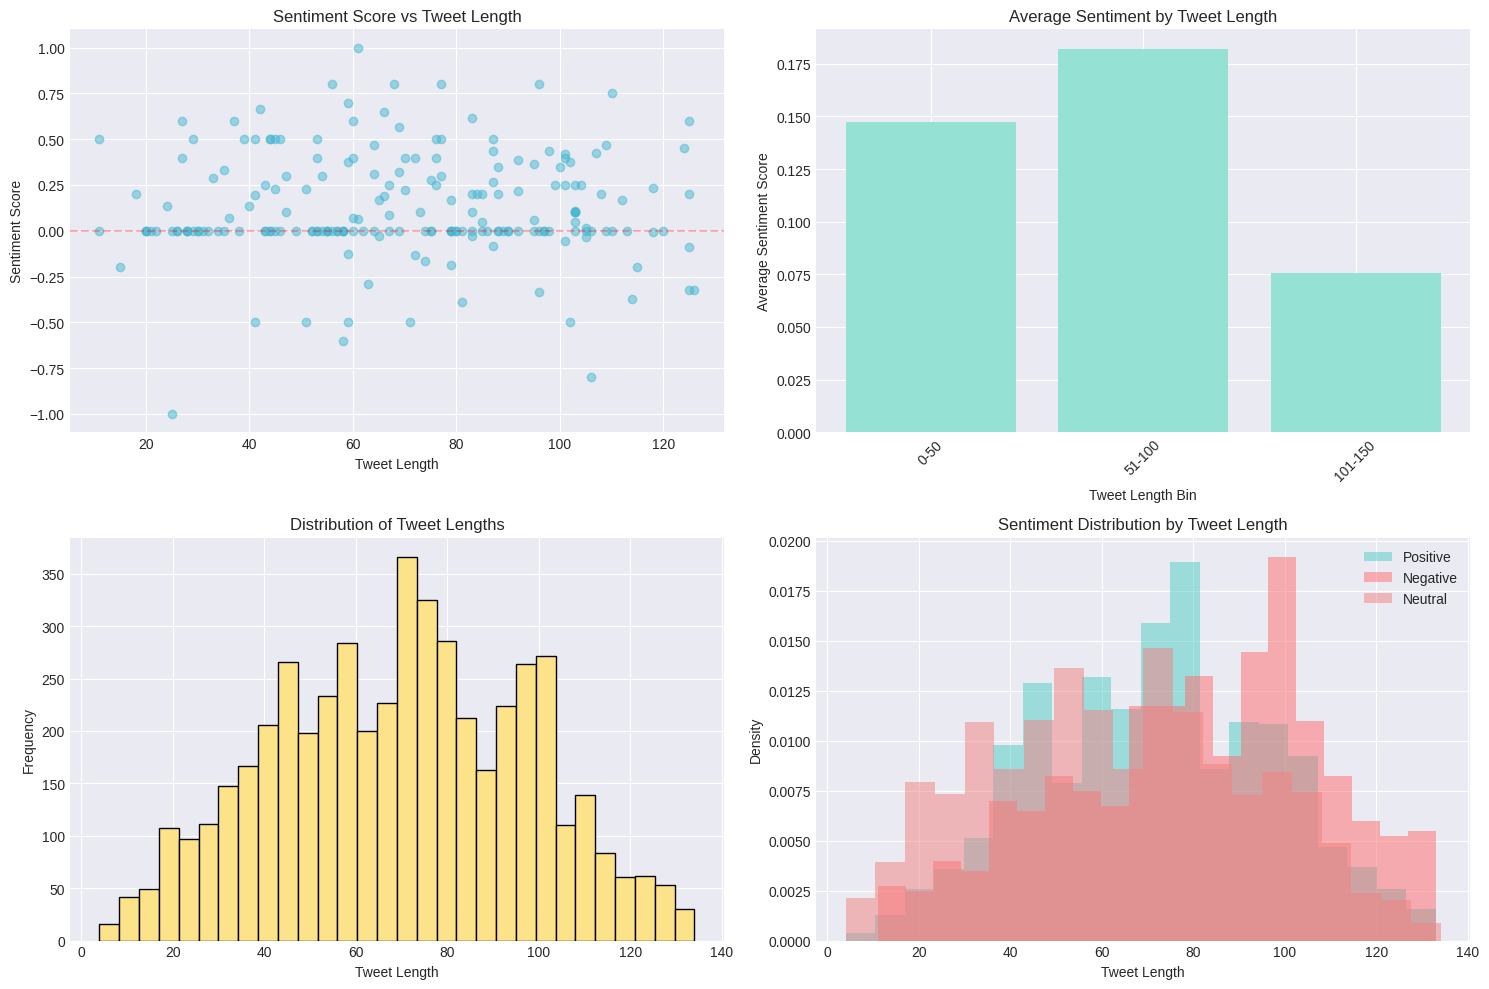

In [ ]:

# 9. SENTIMENT TRENDS OVER TEXT LENGTH

# Create bins for tweet length
df['length_bin'] = pd.cut(df['tweet_length'],
                         bins=[0, 50, 100, 150, 200, 250, 300],
                         labels=['0-50', '51-100', '101-150', '151-200', '201-250', '251-300'])

# Calculate average sentiment by length
sentiment_by_length = df.groupby('length_bin')['tb_score'].mean().reset_index()

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Sentiment vs Length scatter
axes[0, 0].scatter(df['tweet_length'][:200], df['tb_score'][:200], alpha=0.5, color='#45B7D1')
axes[0, 0].set_xlabel('Tweet Length')
axes[0, 0].set_ylabel('Sentiment Score')
axes[0, 0].set_title('Sentiment Score vs Tweet Length')
axes[0, 0].axhline(y=0, color='r', linestyle='--', alpha=0.3)

# 2. Average sentiment by length bin
axes[0, 1].bar(sentiment_by_length['length_bin'].astype(str),
               sentiment_by_length['tb_score'],
               color='#95E1D3')
axes[0, 1].set_xlabel('Tweet Length Bin')
axes[0, 1].set_ylabel('Average Sentiment Score')
axes[0, 1].set_title('Average Sentiment by Tweet Length')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Distribution of tweet lengths
axes[1, 0].hist(df['tweet_length'], bins=30, color='#FCE38A', edgecolor='black')
axes[1, 0].set_xlabel('Tweet Length')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Tweet Lengths')

# 4. Sentiment density plot
for sentiment, color in [('Positive', '#4ECDC4'), ('Negative', '#FF6B6B'), ('Neutral', '#F38181')]:
    subset = df[df['tb_sentiment'] == sentiment]
    axes[1, 1].hist(subset['tweet_length'], bins=20, alpha=0.5,
                   label=sentiment, color=color, density=True)
axes[1, 1].set_xlabel('Tweet Length')
axes[1, 1].set_ylabel('Density')
axes[1, 1].set_title('Sentiment Distribution by Tweet Length')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [ ]:

# 10. ADVANCED ANALYSIS: TIME-BASED SENTIMENT (Simulated)

# we'll simulate time-based analysis
np.random.seed(42)
df['simulated_date'] = pd.date_range(start='2024-01-01', periods=len(df), freq='H')

# Calculate daily sentiment
df['simulated_day'] = df['simulated_date'].dt.date
daily_sentiment = df.groupby('simulated_day')['tb_score'].agg(['mean', 'count']).reset_index()

# Create time series visualization
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=('Daily Average Sentiment Trend', 'Daily Tweet Volume'),
    vertical_spacing=0.1
)

# Sentiment trend
fig.add_trace(
    go.Scatter(x=daily_sentiment['simulated_day'],
               y=daily_sentiment['mean'],
               mode='lines+markers',
               name='Avg Sentiment',
               line=dict(color='#4ECDC4', width=2)),
    row=1, col=1
)

# Tweet volume
fig.add_trace(
    go.Bar(x=daily_sentiment['simulated_day'],
           y=daily_sentiment['count'],
           name='Tweet Volume',
           marker_color='#FF6B6B'),
    row=2, col=1
)

fig.update_layout(height=600, width=1000,
                  title_text="Simulated Time-Based Sentiment Analysis",
                  showlegend=True)
fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_yaxes(title_text="Average Sentiment Score", row=1, col=1)
fig.update_yaxes(title_text="Number of Tweets", row=2, col=1)
fig.show()

In [ ]:

# 11. SENTIMENT ANALYSIS FOR SPECIFIC BRANDS/TOPICS (Example)

# Define keywords for different brands/topics
brand_keywords = {
    'Technology': ['iphone', 'samsung', 'google', 'microsoft', 'facebook'],
    'Entertainment': ['movie', 'music', 'netflix', 'youtube', 'game'],
    'Sports': ['football', 'basketball', 'soccer', 'game', 'player'],
    'Politics': ['trump', 'biden', 'election', 'government', 'policy']
}

# Analyze sentiment for each category
brand_analysis = []

for brand, keywords in brand_keywords.items():
    # Find tweets containing any of the keywords
    mask = df['cleaned_tweet'].str.contains('|'.join(keywords), case=False)
    brand_tweets = df[mask]

    if len(brand_tweets) > 0:
        avg_sentiment = brand_tweets['tb_score'].mean()
        sentiment_dist = brand_tweets['tb_sentiment'].value_counts(normalize=True)

        brand_analysis.append({
            'Brand/Topic': brand,
            'Total_Tweets': len(brand_tweets),
            'Avg_Sentiment': avg_sentiment,
            'Positive_%': sentiment_dist.get('Positive', 0) * 100,
            'Negative_%': sentiment_dist.get('Negative', 0) * 100,
            'Neutral_%': sentiment_dist.get('Neutral', 0) * 100
        })

# Create analysis DataFrame
brand_df = pd.DataFrame(brand_analysis)

# Visualization
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Average Sentiment by Topic',
                    'Tweet Volume by Topic',
                    'Positive Sentiment Percentage',
                    'Sentiment Distribution'),
    specs=[[{'type': 'bar'}, {'type': 'bar'}],
           [{'type': 'bar'}, {'type': 'scatter'}]]
)

# 1. Average sentiment
fig.add_trace(
    go.Bar(x=brand_df['Brand/Topic'], y=brand_df['Avg_Sentiment'],
           name='Avg Sentiment', marker_color='#95E1D3'),
    row=1, col=1
)

# 2. Tweet volume
fig.add_trace(
    go.Bar(x=brand_df['Brand/Topic'], y=brand_df['Total_Tweets'],
           name='Tweet Volume', marker_color='#F38181'),
    row=1, col=2
)

# 3. Positive percentage
fig.add_trace(
    go.Bar(x=brand_df['Brand/Topic'], y=brand_df['Positive_%'],
           name='Positive %', marker_color='#4ECDC4'),
    row=2, col=1
)

# 4. Sentiment distribution scatter
fig.add_trace(
    go.Scatter(x=brand_df['Brand/Topic'], y=brand_df['Positive_%'],
               mode='markers+text', name='Positive',
               text=['Positive'], textposition='top center',
               marker=dict(size=15, color='#4ECDC4')),
    row=2, col=2
)
fig.add_trace(
    go.Scatter(x=brand_df['Brand/Topic'], y=brand_df['Negative_%'],
               mode='markers+text', name='Negative',
               text=['Negative'], textposition='top center',
               marker=dict(size=15, color='#FF6B6B')),
    row=2, col=2
)
fig.add_trace(
    go.Scatter(x=brand_df['Brand/Topic'], y=brand_df['Neutral_%'],
               mode='markers+text', name='Neutral',
               text=['Neutral'], textposition='top center',
               marker=dict(size=15, color='#FCE38A')),
    row=2, col=2
)

fig.update_layout(height=700, width=1000,
                  title_text="Brand/Topic-wise Sentiment Analysis",
                  showlegend=True)
fig.show()

print("\nBrand/Topic Analysis Summary:")
print(brand_df.to_string(index=False))


Brand/Topic Analysis Summary:
  Brand/Topic  Total_Tweets  Avg_Sentiment  Positive_%  Negative_%  Neutral_%
   Technology            15       0.038889   33.333333   20.000000  46.666667
Entertainment           214       0.091722   42.523364   22.897196  34.579439
       Sports            96       0.020080   32.291667   38.541667  29.166667
     Politics            89       0.034380   28.089888   22.471910  49.438202


In [ ]:

# 12. INSIGHTS AND RECOMMENDATIONS

print("="*60)
print("SENTIMENT ANALYSIS INSIGHTS AND RECOMMENDATIONS")
print("="*60)

# Key Insights
print("\n🔍 KEY INSIGHTS:")
print("-"*40)

# 1. Overall sentiment distribution
pos_percentage = (df['tb_sentiment'] == 'Positive').mean() * 100
neg_percentage = (df['tb_sentiment'] == 'Negative').mean() * 100
neu_percentage = (df['tb_sentiment'] == 'Neutral').mean() * 100

print(f"1. Overall sentiment breakdown:")
print(f"   • Positive: {pos_percentage:.1f}%")
print(f"   • Negative: {neg_percentage:.1f}%")
print(f"   • Neutral:  {neu_percentage:.1f}%")

# 2. Agreement between methods
agreement_rate = (df['tb_sentiment'] == df['vader_sentiment']).mean() * 100
print(f"\n2. Sentiment analysis method agreement: {agreement_rate:.1f}%")

# 3. Most discussed topics
all_words = ' '.join(df['processed_tweet']).split()
word_freq = Counter(all_words)
top_topics = word_freq.most_common(10)
print(f"\n3. Top 10 most discussed topics:")
for i, (word, freq) in enumerate(top_topics, 1):
    print(f"   {i}. {word}: {freq} mentions")

# 4. Sentiment by tweet length
short_sentiment = df[df['tweet_length'] < 50]['tb_score'].mean()
long_sentiment = df[df['tweet_length'] >= 100]['tb_score'].mean()
print(f"\n4. Sentiment by tweet length:")
print(f"   • Short tweets (<50 chars): {short_sentiment:.3f} avg score")
print(f"   • Long tweets (≥100 chars): {long_sentiment:.3f} avg score")

# Recommendations
print("\n💡 RECOMMENDATIONS FOR BRANDS:")
print("-"*40)
print("1. MONITOR KEY TOPICS:")
print("   • Track sentiment around your brand keywords daily")
print("   • Set up alerts for negative sentiment spikes")

print("\n2. ENGAGEMENT STRATEGY:")
print("   • Respond quickly to negative mentions")
print("   • Amplify positive sentiment through retweets")
print("   • Neutral sentiment presents opportunity for engagement")

print("\n3. CONTENT OPTIMIZATION:")
print("   • Short tweets tend to have clearer sentiment")
print("   • Use positive words identified in analysis")
print("   • Avoid words associated with negative sentiment")

print("\n4. PERFORMANCE METRICS:")
print("   • Track sentiment trends over time")
print("   • Monitor sentiment by topic/brand category")
print("   • Measure sentiment improvement after campaigns")

print("\n5. CRISIS MANAGEMENT:")
print("   • Identify negative sentiment clusters early")
print("   • Have response templates ready for common issues")
print("   • Use sentiment analysis to measure crisis recovery")

# Generate report
print("\n📊 REPORT SUMMARY:")
print("-"*40)
print(f"Total Tweets Analyzed: {len(df):,}")
print(f"Positive Tweets: {len(df[df['tb_sentiment'] == 'Positive']):,}")
print(f"Negative Tweets: {len(df[df['tb_sentiment'] == 'Negative']):,}")
print(f"Neutral Tweets:  {len(df[df['tb_sentiment'] == 'Neutral']):,}")
print(f"Average Sentiment Score: {df['tb_score'].mean():.3f}")

# Save analysis results
df.to_csv('sentiment_analysis_results.csv', index=False)
brand_df.to_csv('brand_topic_analysis.csv', index=False)

print("\n✅ Analysis complete! Results saved to CSV files.")

SENTIMENT ANALYSIS INSIGHTS AND RECOMMENDATIONS

🔍 KEY INSIGHTS:
----------------------------------------
1. Overall sentiment breakdown:
   • Positive: 49.2%
   • Negative: 13.2%
   • Neutral:  37.7%

2. Sentiment analysis method agreement: 68.3%

3. Top 10 most discussed topics:
   1. love: 472 mentions
   2. day: 412 mentions
   3. happy: 279 mentions
   4. u: 256 mentions
   5. amp: 242 mentions
   6. time: 213 mentions
   7. like: 196 mentions
   8. im: 193 mentions
   9. life: 175 mentions
   10. smile: 170 mentions

4. Sentiment by tweet length:
   • Short tweets (<50 chars): 0.148 avg score
   • Long tweets (≥100 chars): 0.076 avg score

💡 RECOMMENDATIONS FOR BRANDS:
----------------------------------------
1. MONITOR KEY TOPICS:
   • Track sentiment around your brand keywords daily
   • Set up alerts for negative sentiment spikes

2. ENGAGEMENT STRATEGY:
   • Respond quickly to negative mentions
   • Amplify positive sentiment through retweets
   • Neutral sentiment presents o

In [ ]:

# 13. BONUS: REAL-TIME SENTIMENT ANALYSIS SIMULATION

print("="*60)
print("REAL-TIME SENTIMENT ANALYSIS SIMULATION")
print("="*60)

# Simulate real-time analysis
sample_tweets = [
    "I love this new product! It's amazing and works perfectly!",
    "This is the worst service I've ever experienced. Never again!",
    "The movie was okay, nothing special but not bad either.",
    "Customer support was helpful and solved my issue quickly.",
    "Disappointed with the quality. Expected much better."
]

print("\nAnalyzing sample tweets in real-time:")
print("-"*40)

for i, tweet in enumerate(sample_tweets, 1):
    tb_sentiment, tb_score = analyze_sentiment_textblob(tweet)
    vader_sentiment, vader_score = analyze_sentiment_vader(tweet)

    print(f"\nTweet {i}: {tweet}")
    print(f"TextBlob: {tb_sentiment} (Score: {tb_score:.3f})")
    print(f"VADER:    {vader_sentiment} (Score: {vader_score:.3f})")

REAL-TIME SENTIMENT ANALYSIS SIMULATION

Analyzing sample tweets in real-time:
----------------------------------------

Tweet 1: I love this new product! It's amazing and works perfectly!
TextBlob: Positive (Score: 0.568)
VADER:    Positive (Score: 0.930)

Tweet 2: This is the worst service I've ever experienced. Never again!
TextBlob: Neutral (Score: 0.000)
VADER:    Negative (Score: -0.659)

Tweet 3: The movie was okay, nothing special but not bad either.
TextBlob: Positive (Score: 0.402)
VADER:    Positive (Score: 0.557)

Tweet 4: Customer support was helpful and solved my issue quickly.
TextBlob: Positive (Score: 0.333)
VADER:    Positive (Score: 0.765)

Tweet 5: Disappointed with the quality. Expected much better.
TextBlob: Negative (Score: -0.117)
VADER:    Negative (Score: -0.052)


In [ ]:
# ====================
# POWER BI DATA PREPARATION
# ====================
print("Preparing data for Power BI Dashboard...")

# 1. Create main metrics table
powerbi_main = df[['tweet', 'cleaned_tweet', 'tb_sentiment', 'vader_sentiment',
                   'tb_score', 'vader_score', 'tweet_length', 'simulated_date']].copy()

# 2. Create daily aggregated data
daily_metrics = df.groupby(pd.to_datetime(df['simulated_date']).dt.date).agg({
    'tweet': 'count',
    'tb_score': 'mean',
    'vader_score': 'mean',
    'tb_sentiment': lambda x: (x == 'Positive').mean() * 100,
    'vader_sentiment': lambda x: (x == 'Positive').mean() * 100
}).reset_index()
daily_metrics.columns = ['date', 'daily_tweets', 'avg_tb_score', 'avg_vader_score',
                        'positive_percentage_tb', 'positive_percentage_vader']

# 3. Create sentiment summary table
sentiment_summary = pd.DataFrame({
    'Method': ['TextBlob', 'TextBlob', 'TextBlob', 'VADER', 'VADER', 'VADER'],
    'Sentiment': ['Positive', 'Neutral', 'Negative', 'Positive', 'Neutral', 'Negative'],
    'Count': [
        (df['tb_sentiment'] == 'Positive').sum(),
        (df['tb_sentiment'] == 'Neutral').sum(),
        (df['tb_sentiment'] == 'Negative').sum(),
        (df['vader_sentiment'] == 'Positive').sum(),
        (df['vader_sentiment'] == 'Neutral').sum(),
        (df['vader_sentiment'] == 'Negative').sum()
    ]
})

# 4. Create topic/brand analysis
brand_keywords = {
    'Technology': ['iphone', 'samsung', 'google', 'microsoft', 'facebook', 'apple', 'android'],
    'Entertainment': ['movie', 'music', 'netflix', 'youtube', 'game', 'song', 'film'],
    'Sports': ['football', 'basketball', 'soccer', 'game', 'player', 'team', 'match'],
    'Politics': ['trump', 'biden', 'election', 'government', 'policy', 'vote', 'president']
}

topic_data = []
for topic, keywords in brand_keywords.items():
    mask = df['cleaned_tweet'].str.contains('|'.join(keywords), case=False, na=False)
    topic_tweets = df[mask]

    if len(topic_tweets) > 0:
        topic_data.append({
            'Topic': topic,
            'Tweet_Count': len(topic_tweets),
            'Avg_Sentiment_Score': topic_tweets['tb_score'].mean(),
            'Positive_Percentage': (topic_tweets['tb_sentiment'] == 'Positive').mean() * 100,
            'Negative_Percentage': (topic_tweets['tb_sentiment'] == 'Negative').mean() * 100,
            'Neutral_Percentage': (topic_tweets['tb_sentiment'] == 'Neutral').mean() * 100,
            'Keywords': ', '.join(keywords[:3])  # Show first 3 keywords
        })

topic_df = pd.DataFrame(topic_data)

# 5. Create word frequency data for word cloud
from collections import Counter
all_words = ' '.join(df['cleaned_tweet']).split()
word_freq = Counter(all_words)
word_cloud_data = pd.DataFrame(word_freq.most_common(50), columns=['word', 'frequency'])

# 6. Create sentiment by tweet length
df['length_category'] = pd.cut(df['tweet_length'],
                              bins=[0, 50, 100, 150, 200, 300, 500],
                              labels=['0-50', '51-100', '101-150', '151-200', '201-300', '301-500'])

length_sentiment = df.groupby('length_category').agg({
    'tweet': 'count',
    'tb_score': 'mean',
    'tb_sentiment': lambda x: (x == 'Positive').mean() * 100
}).reset_index()

# 7. Export all files
powerbi_main.to_csv('powerbi_main_data.csv', index=False)
daily_metrics.to_csv('powerbi_daily_metrics.csv', index=False)
sentiment_summary.to_csv('powerbi_sentiment_summary.csv', index=False)
topic_df.to_csv('powerbi_topic_analysis.csv', index=False)
word_cloud_data.to_csv('powerbi_word_cloud.csv', index=False)
length_sentiment.to_csv('powerbi_length_analysis.csv', index=False)

print("\n✅ Data files created successfully!")
print("1. powerbi_main_data.csv - Raw data")
print("2. powerbi_daily_metrics.csv - Daily trends")
print("3. powerbi_sentiment_summary.csv - Sentiment distribution")
print("4. powerbi_topic_analysis.csv - Brand/topic analysis")
print("5. powerbi_word_cloud.csv - Word frequency")
print("6. powerbi_length_analysis.csv - Length vs sentiment")

# Download files
from google.colab import files
files.download('powerbi_main_data.csv')
files.download('powerbi_daily_metrics.csv')
files.download('powerbi_sentiment_summary.csv')
files.download('powerbi_topic_analysis.csv')
files.download('powerbi_word_cloud.csv')
files.download('powerbi_length_analysis.csv')

print("\n📁 All files downloaded. Now install Power BI Desktop!")

Preparing data for Power BI Dashboard...

✅ Data files created successfully!
1. powerbi_main_data.csv - Raw data
2. powerbi_daily_metrics.csv - Daily trends
3. powerbi_sentiment_summary.csv - Sentiment distribution
4. powerbi_topic_analysis.csv - Brand/topic analysis
5. powerbi_word_cloud.csv - Word frequency
6. powerbi_length_analysis.csv - Length vs sentiment


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


📁 All files downloaded. Now install Power BI Desktop!
